In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
%matplotlib inline
sns.set(font_scale=1.5)

In [2]:
data=pd.read_excel("gender_classification_v7.xlsx",header=0)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


# DATA CLEANING

In [3]:
data.isna().sum()  #to check null vales

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [4]:
data.shape  #gives us the number of rows and columns

(5001, 8)

In [5]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].unique())      #gives the unique values in each column

[1 0]
[11.8 14.  14.4 13.5 13.  15.3 11.9 12.1 12.5 15.5 14.7 14.5 14.2 15.2
 14.6 12.8 12.9 12.2 12.3 12.7 14.1 11.5 13.8 13.7 12.  11.4 15.4 13.3
 13.2 14.3 13.9 11.7 15.1 15.  12.4 11.6 12.6 14.8 13.1 13.4 13.6 14.9]
[6.1 5.4 6.3 5.9 6.8 6.2 5.2 5.8 6.7 6.5 6.  5.6 7.  6.4 5.3 5.7 5.1 5.5
 7.1 6.6 6.9]
[1 0]
[0 1]
[1 0]
[1 0]
['Male' 'Female']


In [6]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].value_counts())     #gives the count of unique values in each column

1    4349
0     652
Name: long_hair, dtype: int64
12.0    168
11.8    161
14.1    155
14.0    154
11.5    154
11.6    152
11.9    150
13.3    149
14.2    149
12.2    145
12.6    145
12.1    145
13.2    143
14.3    143
12.9    141
12.5    141
13.7    140
12.8    138
12.3    138
13.6    138
13.0    137
13.4    137
13.5    136
13.8    134
11.7    133
13.1    131
13.9    131
12.7    130
12.4    127
11.4     84
14.9     79
14.5     72
15.2     71
15.5     66
15.1     65
15.4     64
15.3     64
14.4     63
14.6     61
15.0     60
14.7     59
14.8     48
Name: forehead_width_cm, dtype: int64
5.7    306
5.9    303
5.3    301
5.5    299
6.1    296
5.1    293
6.2    290
5.8    290
6.4    287
6.3    285
6.5    285
5.6    279
6.0    275
5.4    265
5.2    259
6.6    126
6.8    118
7.0    117
7.1    113
6.9    109
6.7    105
Name: forehead_height_cm, dtype: int64
0    2531
1    2470
Name: nose_wide, dtype: int64
1    2540
0    2461
Name: nose_long, dtype: int64
0    2535
1    2466
Name: lips_thin, d

In [7]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


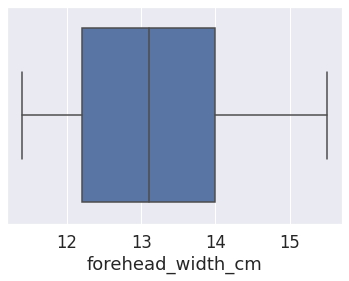

In [8]:
sns.boxplot(data['forehead_width_cm'])   #for checking outliers

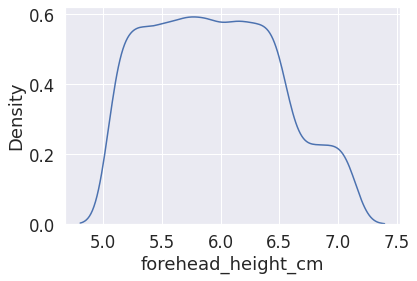

In [9]:
sns.kdeplot(data['forehead_height_cm'])    #for checking outliers

# EDA

<function matplotlib.pyplot.show(*args, **kw)>

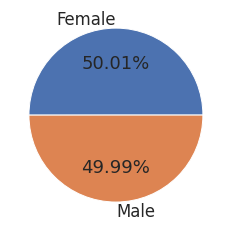

In [10]:
y = data.groupby("gender")["gender"].count()
y

plt.pie(y, labels=y.index, autopct="%.2f%%")
plt.show

In [11]:
c = data.groupby('gender')['forehead_width_cm'].median()
c

gender
Female    12.8
Male      13.6
Name: forehead_width_cm, dtype: float64

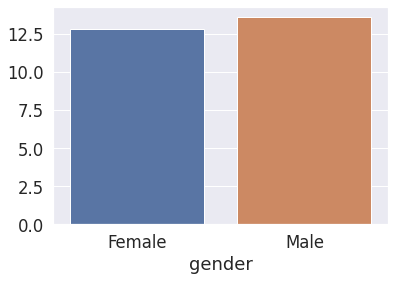

In [12]:
sns.barplot(y=c.values,x=c.index)      

In [13]:
d = data.groupby('gender')['forehead_height_cm'].median()
d

gender
Female    5.8
Male      6.1
Name: forehead_height_cm, dtype: float64

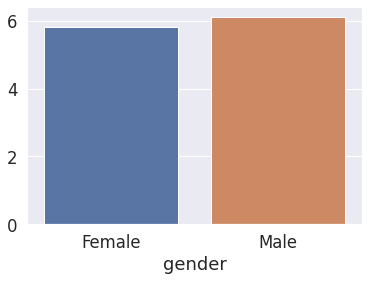

In [14]:
sns.barplot(y=d.values,x=d.index)

we observe that there is not much difference between the average height and width of forehead between male and female

In [15]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [16]:
e = data.groupby('gender')['long_hair'].sum()
e

gender
Female    2184
Male      2165
Name: long_hair, dtype: int64

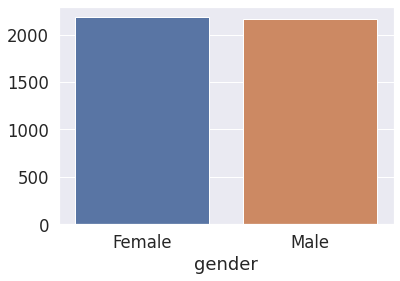

In [17]:
sns.barplot(y=e.values,x=e.index)

we observe that there is not much difference between lengths of the hair between male and female according to the data

In [18]:
f = data.groupby('gender')['nose_wide'].sum()
f 

gender
Female     287
Male      2183
Name: nose_wide, dtype: int64

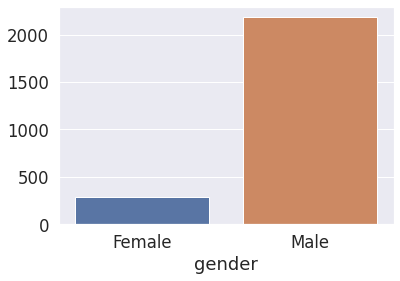

In [19]:
sns.barplot(y=f.values,x=f.index)         

we observe that majority of the males have a wider nose

In [20]:
g = data.groupby('gender')['nose_long'].sum()
g

gender
Female     340
Male      2200
Name: nose_long, dtype: int64

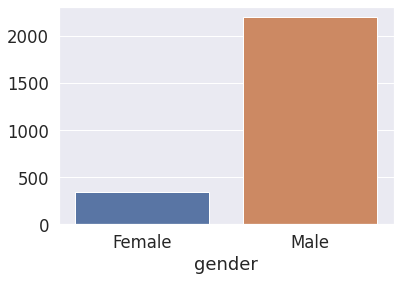

In [21]:
sns.barplot(y=g.values,x=g.index) 

we observe that majority of the males also have longer nose

In [22]:
h = data.groupby('gender')['lips_thin'].sum()
h

gender
Female     304
Male      2162
Name: lips_thin, dtype: int64

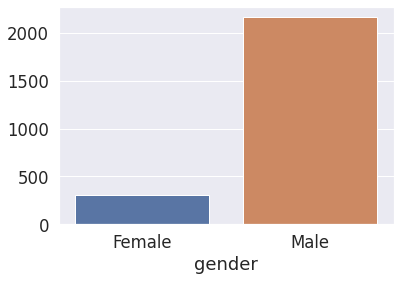

In [23]:
sns.barplot(y=h.values,x=h.index)

we observe that majority of the males have thinner lips

In [24]:
i = data.groupby('gender')['distance_nose_to_lip_long'].sum()
i

gender
Female     304
Male      2191
Name: distance_nose_to_lip_long, dtype: int64

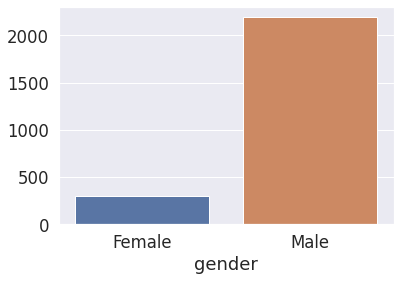

In [25]:
sns.barplot(y=i.values,x=i.index)

even here we observe that majority of males have a long distance between nose and lip

In [26]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [27]:
data["gender"] = data["gender"].replace({'Male': 0, 'Female': 1})

# Predictive analysis

In [28]:
data.head() ,"forehead_width_cm","forehead_height_cm","long_hair"

(   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
 0          1               11.8                 6.1          1          0   
 1          0               14.0                 5.4          0          0   
 2          0               11.8                 6.3          1          1   
 3          0               14.4                 6.1          0          1   
 4          1               13.5                 5.9          0          0   
 
    lips_thin  distance_nose_to_lip_long  gender  
 0          1                          1       0  
 1          1                          0       1  
 2          1                          1       0  
 3          1                          1       0  
 4          0                          0       1  ,
 'forehead_width_cm',
 'forehead_height_cm',
 'long_hair')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop("gender",axis=1)
y = data["gender"]

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=55)

In [32]:
from sklearn.linear_model import LogisticRegression     #applying logistic regression

logreg= LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000000000.0)

In [33]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

## Evaluating model

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8614079385203257

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9653564290473018

The accuracy of the model is 97%

#Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[738,  21],
       [ 31, 711]])

#Neural Network

In [62]:
import tensorflow as tf
tf.random.set_seed(55)
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
history= model.fit(X_train, y_train, epochs= 500)

Epoch 1/500
110/110 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.7983 - precision: 0.9377 - a=recall: 0.6413
Epoch 2/500
110/110 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.9509 - precision: 0.9818 - a=recall: 0.9193
Epoch 3/500
110/110 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9580 - precision: 0.9775 - a=recall: 0.9380
Epoch 4/500
110/110 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9574 - precision: 0.9686 - a=recall: 0.9460
Epoch 5/500
110/110 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9551 - precision: 0.9625 - a=recall: 0.9477
Epoch 6/500
110/110 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9611 - precision: 0.9634 - a=recall: 0.9591
Epoch 7/500
110/110 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9571 - precision: 0.9605 - a=recall: 0.9540
Epoch 8/500
110/110 

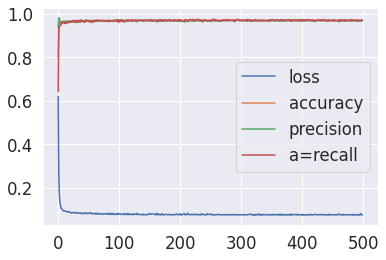

In [65]:
pd.DataFrame(history.history).plot()

In [67]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9660 - precision: 0.9625 - a=recall: 0.9690


[0.07849664241075516,
 0.9660226702690125,
 0.962516725063324,
 0.9690027236938477]

In [68]:
tf.random.set_seed(55)
model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [69]:
model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [70]:
history= model1.fit(X_train, y_train, epochs= 400)

Epoch 1/400
110/110 [==============================] - 1s 2ms/step - loss: 0.7239 - accuracy: 0.4974 - precision: 0.0000e+00 - a=recall: 0.0000e+00
Epoch 2/400
110/110 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.4977 - precision: 1.0000 - a=recall: 5.6850e-04
Epoch 3/400
110/110 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.5674 - precision: 0.9804 - a=recall: 0.1421
Epoch 4/400
110/110 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7126 - precision: 0.9245 - a=recall: 0.4662
Epoch 5/400
110/110 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7943 - precision: 0.9206 - a=recall: 0.6464
Epoch 6/400
110/110 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.8366 - precision: 0.9520 - a=recall: 0.7106
Epoch 7/400
110/110 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8629 - precision: 0.9644 - a=recall: 0.7550
Epoch 8/

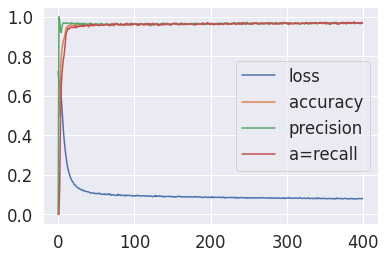

In [71]:
pd.DataFrame(history.history).plot()

In [72]:
model1.evaluate(X_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9560 - precision: 0.9956 - a=recall: 0.9151


[0.11401093006134033,
 0.9560292959213257,
 0.9956011772155762,
 0.9150943160057068]